✅ Bibliotecas carregadas!

✅ Dados preparados:
    Year  Temperature  Sea_Level
0  1993         0.22        0.0
1  1994         0.30        1.2
2  1995         0.42        2.4
3  1996         0.32        3.1
4  1997         0.45        4.0

📊 Resultados:
- RMSE: 4.92
- R²: 0.9793
- Coeficiente (ângulo): 3.7813
- Intercepto: -7548.97


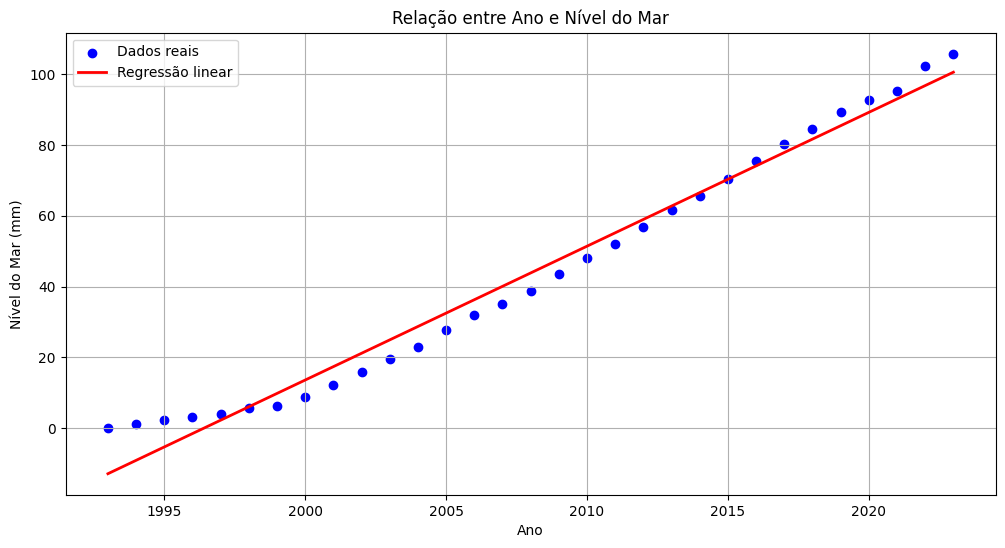

In [5]:
# %% [markdown]
## 1. CONFIGURAÇÃO INICIAL
# %% [code]
try:
    import pandas as pd
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    import matplotlib.pyplot as plt
    print("✅ Bibliotecas carregadas!")
except ImportError as e:
    print(f"❌ Erro: {e}\nExecute: pip install scikit-learn pandas matplotlib")

# %% [markdown]
## 2. CARREGAR E PREPARAR DADOS
# %% [code]
try:
    # Carregar dados
    temp_global = pd.read_csv('../data/global_temperature.csv')
    nivel_mar = pd.read_csv('../data/sea_level.csv')
    
    # Juntar dados pelo ano
    dados = pd.merge(temp_global, nivel_mar, on='Year')
    
    # Definir variáveis
    X = dados[['Year']]  # Variável independente
    y = dados['Sea_Level']  # Variável dependente (ajuste o nome se necessário)
    
    print("\n✅ Dados preparados:\n", dados.head())
except Exception as e:
    print(f"❌ Erro ao carregar dados: {e}")

# %% [markdown]
## 3. MODELO DE REGRESSÃO
# %% [code]
if 'X' in locals() and 'y' in locals():
    try:
        # Criar e treinar modelo
        model = LinearRegression()
        model.fit(X, y)
        
        # Previsões
        predictions = model.predict(X)
        
        # Métricas
        rmse = np.sqrt(mean_squared_error(y, predictions))
        r2 = r2_score(y, predictions)
        
        print(f"\n📊 Resultados:")
        print(f"- RMSE: {rmse:.2f}")
        print(f"- R²: {r2:.4f}")
        print(f"- Coeficiente (ângulo): {model.coef_[0]:.4f}")
        print(f"- Intercepto: {model.intercept_:.2f}")
        
        # Gráfico
        plt.figure(figsize=(12, 6))
        plt.scatter(X, y, color='blue', label='Dados reais')
        plt.plot(X, predictions, color='red', linewidth=2, label='Regressão linear')
        plt.title('Relação entre Ano e Nível do Mar')
        plt.xlabel('Ano')
        plt.ylabel('Nível do Mar (mm)')
        plt.legend()
        plt.grid(True)
        plt.savefig('../reports/regressao_linear.png', dpi=300)
        plt.show()
        
    except Exception as e:
        print(f"❌ Erro no modelo: {e}")
else:
    print("⚠️ Variáveis X/y não definidas. Verifique o carregamento dos dados.")